In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [5]:
# Load dataset
data = pd.read_csv("/Users/dhruvpai/Downloads/practicals/datasets/uber.csv")

In [19]:
# Identifying outliers in 'fare_amount' based on IQR
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['fare_amount'] < (Q1 - 1.5 * IQR)) | (data['fare_amount'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'fare_amount':", len(outliers))

Number of outliers in 'fare_amount': 17071


In [6]:
# Data Preprocessing
data.dropna(inplace=True)
data = data[(data['fare_amount'] >= 2.5) & (data['fare_amount'] <= 100)]  # Remove outliers in fare

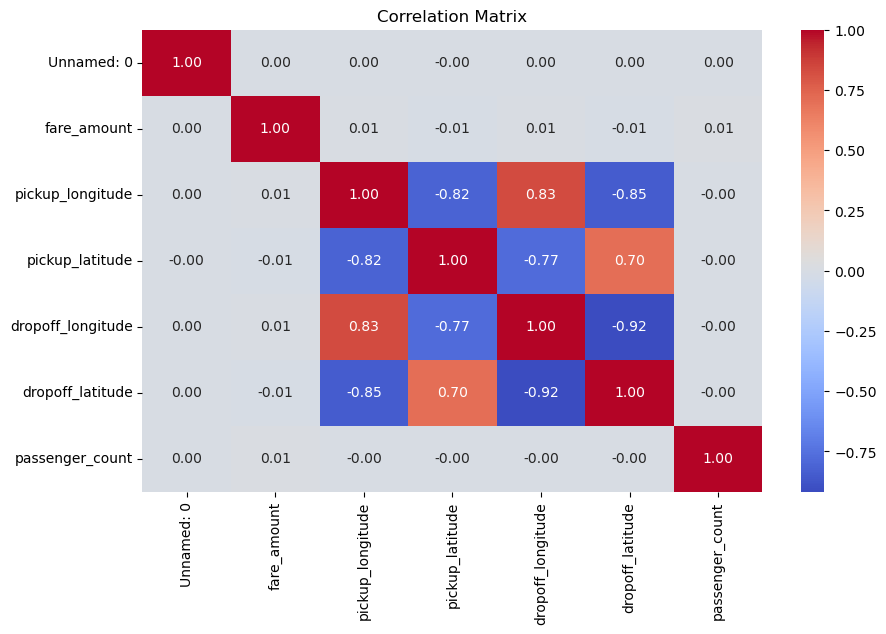

In [26]:
# Check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [20]:
# Feature and target separation
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

In [24]:
# Train, predict, and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }
    print(f"{name} - R2 Score: {results[name]['R2 Score']:.2f}, RMSE: {results[name]['RMSE']:.2f}")


Linear Regression - R2 Score: 0.00, RMSE: 9.33
Ridge Regression - R2 Score: 0.00, RMSE: 9.33
Lasso Regression - R2 Score: 0.00, RMSE: 9.33


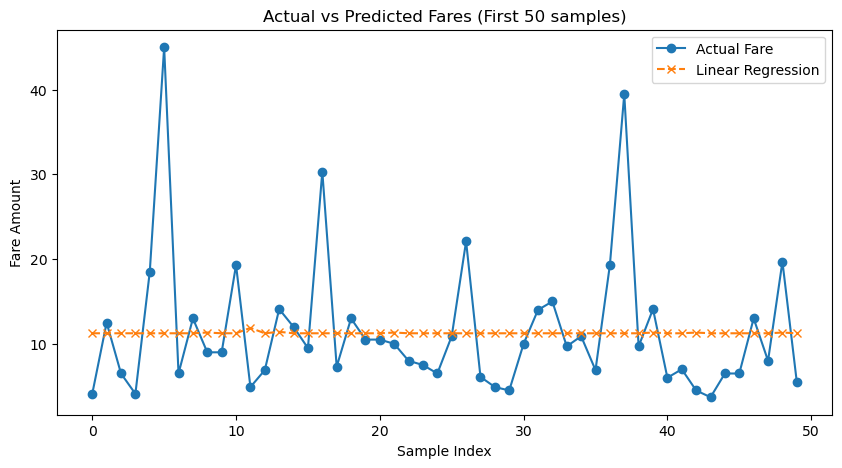

In [25]:
# Visualization of Actual vs Predicted (First 50 samples)
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Fare", marker='o')
plt.plot(models["Linear Regression"].predict(X_test)[:50], label="Linear Regression", linestyle="--", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Fare Amount")
plt.legend()
plt.title("Actual vs Predicted Fares (First 50 samples)")
plt.show()

Data Loading and Preprocessing:
Loads the dataset, removes rows with missing values, and filters out extreme fare values to simplify the dataset. 

The next segment calculates the interquartile range (IQR) for fare_amount to identify outliers.
Q1 and Q3 are the 25th and 75th percentiles.
IQR is the range between these quartiles.
Any values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are flagged as outliers.
The print statement outputs the count of outliers found.

Then it Filters out entries where fare_amount is either too low or too high. Only values between $2.5 and $100 are retained, assuming this range represents plausible fares.

This code creates a heatmap of the correlation matrix, showing how features are related to each other and to fare_amount.
data.corr() calculates pairwise correlations between columns.
sns.heatmap() visualizes these correlations with colors, with annot=True displaying the actual correlation values.


Feature Selection:
Uses basic location and passenger count features for prediction. This is a simplified selection to maintain model focus on key variables 

Train-Test Split:
Splits the data into training and testing sets for model evaluation. 

Model Training and Evaluation:
Trains linear, Ridge, and Lasso regression models. Each model is evaluated using R2 and RMSE metrics to measure prediction accuracy. 
*Linear Regression* is the simplest regression model that fits a linear relationship. Provides a straightforward approach to model the relationship between features and the target. It works well for data where the relationship is mostly linear.

*Ridge Regression* adds a penalty (or regularization) to the regression loss based on the square of the coefficients, reducing overfitting by penalizing large coefficients. alpha=1.0 controls the regularization strength. Regularizes (penalizes) the model to prevent overfitting by limiting the size of coefficients, useful when multicollinearity is present among features.

*Lasso Regression* adds an L1 penalty (based on absolute values of the coefficients), effectively shrinking some coefficients to zero, useful for feature selection. Also regularizes the model but can shrink some coefficients to zero, effectively selecting features by eliminating less important ones. This can improve interpretability and reduce overfitting.

R2 Score: Measures how well the model explains the variance in fare_amount. Higher values (up to 1) are better.
RMSE: Shows the model’s prediction error in the same units as fare_amount (lower RMSE is better).
results dictionary stores R² Score and RMSE for each model for easy comparison.


Visualization:
Plots the actual vs. predicted fare values for the first 50 samples using Linear Regression predictions for simplicity.